# CDC_Capstone: Part III - Modeling

In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# model & metric imports
# Specific imports
# These are new! Notice we're using the 'from' approach to import only what we need.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

# sklearn imports
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Model Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold 

# Create a custom color map.
from matplotlib.colors import ListedColormap

from sklearn import preprocessing

from sklearn.decomposition import PCA


# Statistics imports
#from scipy import stats
#import statsmodels.api as sm

import csv
import import_ipynb
 

### Fitting and Visualizing a logistic Regression  
Goal is to predicts the probability of a binary outcome (0 or 1) for Diabetes diagnosis.


#### Get Data using my Prepare Data Class
will return these dataframe already cleaned and transformed
'menhealth','menhealth','physical','dietary','heart','sex','edu','all' 

In [2]:
#import my class with data.  setup in feature_engineering notebook

from prepare import PrepareData

In [3]:
#Testing - Read local data
prepared_data = PrepareData(download_new=False)

In [4]:
data = prepared_data.run()

### Review dataframe for mental health

In [5]:
data['menhealth'].head()

,Diabetes_binary,Type,MentHlth,Gender
0,0,nondiabetic,14,men
1,0,nondiabetic,0,men
2,0,nondiabetic,0,men
3,0,nondiabetic,0,women
4,1,diabetic,0,women


<AxesSubplot:>

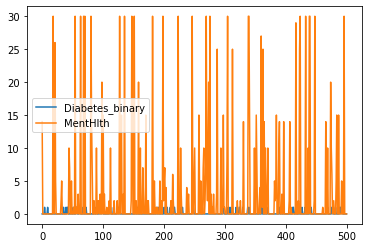

In [6]:
data['menhealth'].plot()

### Get 'All' dataframe and target and feature columns

In [7]:
df = data['all']

In [8]:
#Multiple feature with feature transformation

X = df[['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']]
y  = df["Diabetes_binary"]  #Linear Regression Problem

In [9]:
def train_test_acc(df, feature_cols, response, f_num,track_df):
    """accepts a list of features and stores acc values in dataframe"""
    # Create feature matrix (X).
    X = df[feature_cols]
   
    # Create response vector (y).
    y = df[response]       #independenct variable
        
    
    
    #initialize the StandardScaler object -- 
    s = StandardScaler()
     
    #use fit transform function to standardize   X 
    X_scaled  = s.fit_transform(X)
    
    #Step 1: Split X and y into training and testing sets (using random_state for reproducibility).
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=46)

   # Instantiate a KNN Classifier KNeighborsClassifier with n_neighbors=1
    #knn = KNeighborsClassifier(n_neighbors=1)
    logreg = LogisticRegression(solver='lbfgs', max_iter=5000)
    
    #Set model on the training data
    # Fit the model
    logreg.fit(X_train, y_train)
    
    #Test Accuracy
    y_pred_test  = logreg.predict(X_test)
    
    # compute the accuracy
    acc_test =accuracy_score(y_test, y_pred_test)
    
    #Train accuracy
    y_pred_train  = logreg.predict(X_train)
    
    # compute the accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    
       
    
    
    
    #Diff Test and Train accuracy
    result =  acc_train - acc_test 
     
    return result   #track_df

#### Test out several feature combination.  Select the best accuracy score but not too perfect!

In [10]:
col1 =['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']

In [11]:
col2 =['Income', 'PhysHlth','DiffWalk']

In [12]:
col3 = ['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income']

In [13]:
cols4 =['Income']

In [14]:
df.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education'],
      dtype='object')

In [15]:

features_data = [col1,col2,col3]

#### Step 3: run functions using csv file and write accuracy results to dataframe

In [16]:
#create dataframe to track results
track_logresults = pd.DataFrame(columns = [ 'feature_set','acc_train','acc_test','acc_diff','score', 'cols_'])

In [17]:
for row in features_data :
    #print (row)  
    for i, col in enumerate(row):      #loop every item in that row. Row = row, i = index, col is the actual text
        if i == 0:
            index_ = col
        if i == 1:
            feature_set = (col.strip().split(","))
            print(train_test_acc(df, feature_set, 'Diabetes_binary',index_,track_logresults))
            track_logresults = train_test_acc(df, feature_set, 'Diabetes_binary',index_,track_logresults)

0.001103752759381904
0.001103752759381904
0.001103752759381904


In [18]:
#All columns have the same accuracy score
track_logresults

0.001103752759381904

### Prepare X, y Matrices


Nominal Classification Problem: Predict diabetis for a customer

In [19]:
 
y = df['Diabetes_binary']
X = df[col1]

In [20]:
X.head(3)

,Income,GenHlth,MentHlth,PhysHlth,DiffWalk
0,1,3,10,0,0
1,1,1,0,0,0
2,1,2,0,0,0


In [21]:
X.shape

(253680, 5)

### Scale the data

In [22]:
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

In [23]:
X_scaled [:2]

array([[-2.44013754,  0.45729435,  0.91938247, -0.48659241, -0.44971813],
       [-2.44013754, -1.41453187, -0.42962961, -0.48659241, -0.44971813]])

### Building Models

Logistic Regression using Test Train Split
KNN using a cross-validation, GridSearch
Random Forest

#### reTest Train Split after Scaler to improve accuracy score

In [24]:
#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=123)

logreg  = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:

#predict values usign X test
y_pred = logreg.predict(X_test)

In [26]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [27]:
 
# What is our accuracy on the test set?

# Evaluate the performance using .score() method.

acc_test =logreg.score(X_test, y_test)
print(f'Test Accuracy: {acc_test}')
#verify accuracy result
print(f'Test Accuracy: {np.mean(y_test == logreg.predict(X_test))}')

Test Accuracy: 0.8572216966256702
Test Accuracy: 0.8572216966256702


In [28]:
# What is our accuracy on the test set?

# Evaluate the performance using .score() method.

acc_train =logreg.score(X_train, y_train)
print(f'Train Accuracy: {acc_train}')
#verify accuracy result
print(f'Train Accuracy: {np.mean(y_train == logreg.predict(X_train))}')

Train Accuracy: 0.8582255860401555
Train Accuracy: 0.8582255860401555


In [29]:
print(f'Difference between test and train: {abs(acc_train - acc_test) }')

Difference between test and train: 0.0010038894144853705


Difference between test and train is 0.0009565

### Accuracy and baseline

Store the predicted probabilities of class=1 in its own column in the data set.

In [30]:

# Store the predicted probabilities of class 1.

df['diagnosis_pred_prob'] = logreg.predict_proba(X)[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [31]:
df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,Age,Education,Income,Gender,Types,GeneralHealth,Type,income,education,diagnosis_pred_prob
0,215265,0,0,1,0,30,1,0,0,1,...,3,4,1,men,nondiabetic,Good,nondiabetic,<10K,12orGED,0.277916
1,141614,0,0,0,1,35,1,0,0,1,...,7,4,1,women,nondiabetic,Excellent,nondiabetic,<10K,12orGED,0.189390
2,28979,0,0,0,1,25,0,0,0,1,...,10,2,1,men,nondiabetic,Very good,nondiabetic,<10K,1-8,0.335810
3,123066,1,0,1,1,45,0,0,0,0,...,4,3,1,men,diabetics,Fair,diabetic,<10K,9-11,0.025910
4,36247,0,0,0,1,28,0,0,0,1,...,13,6,1,women,nondiabetic,Good,nondiabetic,<10K,C4+,0.572662


In [32]:
# get the accuracy - note .score() generates the default score appropriate for the model.
# In this case since logistic regression is a classification method it uses accuracy as the default metric.
acc = logreg.score(X,y)

# Compute the accuracy using the .score() method.
print(f'Accuracy: {acc}')

Accuracy: 0.8443550930305898


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Recall that our "baseline" accuracy is the proportion of the majority class label.

In [33]:

1. - y_test.mean()

0.8600599180069379

#### What is our accuracy on the test set?

In [34]:


print(f'Accuracy: {np.mean(y_test == logreg.predict(X_test))}')

Accuracy: 0.8572216966256702


#### View confusion matrix detail

In [35]:
df['Diabetes_binary'].value_counts(normalize=True)

0    0.860667
1    0.139333
Name: Diabetes_binary, dtype: float64

have more data for non diabetics

In [36]:
logreg.predict_proba = logreg.predict(X_test)

In [37]:

# .ravel() flattens out a matrix into 1-d array.
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=logreg.predict_proba > .5).ravel() 
(tn, fp, fn, tp)

(53924, 621, 8434, 441)

In [38]:
y_pred_binary = (logreg.predict_proba > .5).ravel()  # Reshape to 2D and apply threshold

In [39]:
#y_pred_proba = logreg.predict_proba()  # Get the probabilities

tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred_binary).ravel()
(tn, fp, fn, tp)

(53924, 621, 8434, 441)

In [40]:
# Lower the threshold - how does the confusion matrix change?
print(f'Confusion Matrix:\n {confusion_matrix(y_true=y_test, y_pred=logreg.predict_proba > .3)}')

Confusion Matrix:
 [[53924   621]
 [ 8434   441]]


In [41]:
definitions = pd.Series(["NO", "Yes"], dtype="category")

In [42]:
reversefactor = dict(zip(range(2),definitions))
reversefactor

{0: 'NO', 1: 'Yes'}

In [43]:
#Reverse factorize (converting y_pred from 0s,1s  to 
#Dissatfied, loyalist, High_Maintenance,Potential_Loyalist, and Satisified

y_test_v = np.vectorize(reversefactor.get)(y_test)
y_pred_v = np.vectorize(reversefactor.get)(y_pred)

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Type'], colnames=['Predicted Type']))

Predicted Type      0    1
Actual Type               
0               53924  621
1                8434  441


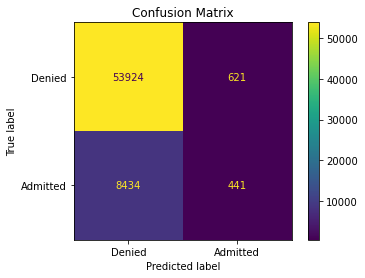

In [44]:
 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=logreg.predict_proba > .3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Denied','Admitted'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Answer - compute accuracy
acc = (tn+tp)/(tp+tn+fp+fn)
print(f'Accuracy (TN+TP)/Total = {acc*100}%')

Accuracy (TN+TP)/Total = 85.72216966256701%


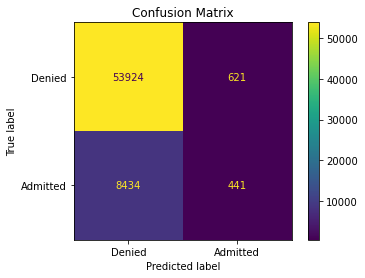

In [46]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=logreg.predict_proba > .3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Denied','Admitted'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [47]:
# confusion matrix statisitics
#for multi-class classificaiton we only need to calcuate the Micro average
#In a multi-class classification setup with highly imbalanced classes, micro-averaging is preferable over macro-averaging.
#reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#one-vs-rest-multiclass-roc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

Micro Precision: 0.86
Micro Recall: 0.86
Micro F1-score: 0.86



It is calculated by considering the total TP, total FP and total FN of the model. It does not consider each class individually, It calculates the metrics globally.

As you can see When we are calculating the metrics globally all the measures become equal. Also if you calculate accuracy you will see that,

Precision = Recall = Micro F1 = Accuracy

Interpretation: Precision is higher than the recall and both precisio and recall are lower than total accuracy.

In [48]:
#Looks at all of the individual types and the total weight avearge


print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted Precision: 0.80
Weighted Recall: 0.86
Weighted F1-score: 0.81


Interpretation: The average performance of each on of the individual customer types have a 80% precision on average.

Will test with 1-more model.  Searching for a model that will have a better accuracy 

In [49]:
# Make predictions for all values of X and add back to the original DataFrame.
y_pred = logreg.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Random Forest  

In [50]:
#initialize the StandardScaler object -- 
s = StandardScaler()
     
#use fit transform function to standardize   X 
X_scaled = s.fit_transform(X)

In [51]:

#y = df['types']
#X = cleaned_data[feature_set]
#Step 1: Split X and y into training and testing sets (using random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#Step 2: Instantiate
rfc = RandomForestClassifier(random_state=1234)
# fit the model
rfc.fit(X_train, y_train)

y_pred_class = rfc.predict(X_test)

In [52]:
# evaluate model using the .score method
acc_rfc_test = rfc.score(X_test, y_test)
acc_rfc_test

0.8536581520025228

In [53]:
# evaluate model using the .score method
acc_rfc_train = rfc.score(X_train, y_train)
acc_rfc_train

0.8703143067381478

print(f'Accuracy is better using the Random Forest Model by {acc_rfc_train - acc_train  } percent')

### I will use the Random Forest model to make my predictions!

In [54]:
#Make predictions on all records and save the results
data['all']['y_pred'] = rfc.predict(X)



In [55]:
data['all'].columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education', 'diagnosis_pred_prob', 'y_pred'],
      dtype='object')

In [56]:
prepared_data.write_data(data, 'data/prepared',index=True )

In [57]:
X.shape

(253680, 5)

In [58]:
#import my class with data.  setup in feature_engineering notebook

from prepare import PrepareData

## Graph prediction: At what point does the diagnosis turn from 0 to 1 for my features
Income	GenHlth	MentHlth	PhysHlth	DiffWalk

In [59]:
#Testing - Read local data
prepared_data = PrepareData(download_new=False)

In [60]:
#Write file to local directory
#prepared_data.write_data(data, 'data/prepared',index=True )

In [61]:
y_pred_data = prepared_data.read_local_data('all', 'data/prepared')

In [62]:
y_pred_data[['Diabetes_binary','y_pred']].head()

,Diabetes_binary,y_pred
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [63]:
#create a dictionary. Save all my dataframes to my dictionary
# Choose a random sample of 2 rows
sample_df = pd.DataFrame(y_pred_data.sample(n=150),columns = y_pred_data.columns)

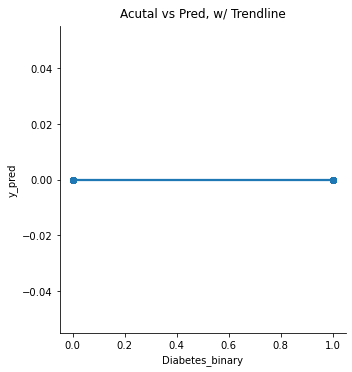

In [64]:
 
#scatter with regression line

#if numbers are overlapping, google python plt .tile( -- use pad



sns.lmplot(x='Diabetes_binary', y='y_pred', data=sample_df);
plt.title('Acutal vs Pred, w/ Trendline',pad = 10);

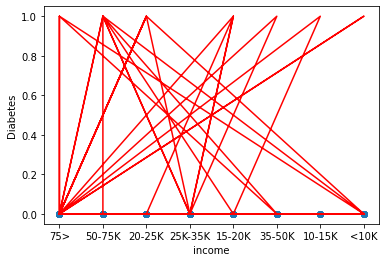

In [65]:

# Scatter plot that includes the regression line
plt.scatter(sample_df['income'], sample_df['y_pred'])
plt.plot(sample_df['income'], sample_df['Diabetes_binary'], color='red')
plt.xlabel('income')
plt.ylabel('Diabetes');

Text(0.5, 1.0, 'Actual vs Prediction')

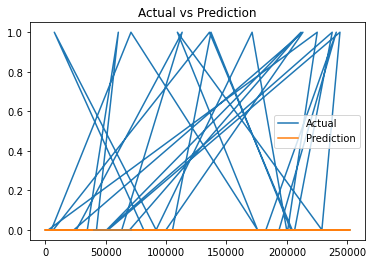

In [66]:
# Assuming 'sample_df' and 'y_pred_data' are DataFrames
y_pred = sample_df['y_pred']
y = sample_df['Diabetes_binary']

# Ensure indices are aligned
y_pred = y_pred.align(y, join='inner', axis=0)[0]

# Plotting
ax = y.plot(label='Actual')
y_pred.plot(label='Prediction')
ax.legend()
ax.set_title('Actual vs Prediction')

## TESTING: saving Model to method which I will use to score new data

In [67]:
df = data['all']

In [68]:
data = prepared_data.run()

In [69]:
df.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education', 'diagnosis_pred_prob', 'y_pred'],
      dtype='object')

In [70]:
#create method to build predition model and return a prediction
%run my_functions.ipynb


In [71]:
df[['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']].head(1)

,Income,GenHlth,MentHlth,PhysHlth,DiffWalk
0,1,3,10,0,0


In [72]:
cols =['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']
df = read_local_data('all', 'data/raw')
y = df['Diabetes_binary']
X = df[cols]

In [73]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [74]:
rfc = RandomForestClassifier(random_state=1234)
rfc.fit(X_scaled,y)

RandomForestClassifier(random_state=1234)

In [75]:
data = [3, 10, 0, 0, 0]
reshaped_data = np.array(data).reshape(1, 5)

In [76]:
prediction = rfc.predict(reshaped_data)

In [77]:
type(prediction[0])

numpy.int64

In [78]:
pred_probability = rfc.predict_proba(reshaped_data)[:, 1]

In [79]:
pred_probability

array([0.49402381])

### You have a 50% probablity you will   be diagnosed with no diabetes 

## Plot Actual vs Prediction

In [80]:
df.columns



Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Gender', 'Types', 'GeneralHealth', 'Type',
       'income', 'education'],
      dtype='object')

### create method to build predition model and return a prediction

In [81]:

%run my_functions.ipynb

In [82]:
data2 = [3, 10, 0, 0, 0]

prediction = make_prediction(data2)

In [83]:
prediction

'You have a 51% probability you will not be diagnosed with diabetes.'

### Added function to prepare.py .  Now will test using the class

In [84]:
data2 = [3, 10, 0, 0, 0]

In [85]:
print( prepared_data.make_prediction(data2))

You have a 51% probability you will not be diagnosed with diabetes.


### Added graph function to prepare.py. Now will test using class

In [86]:

%run my_functions.ipynb

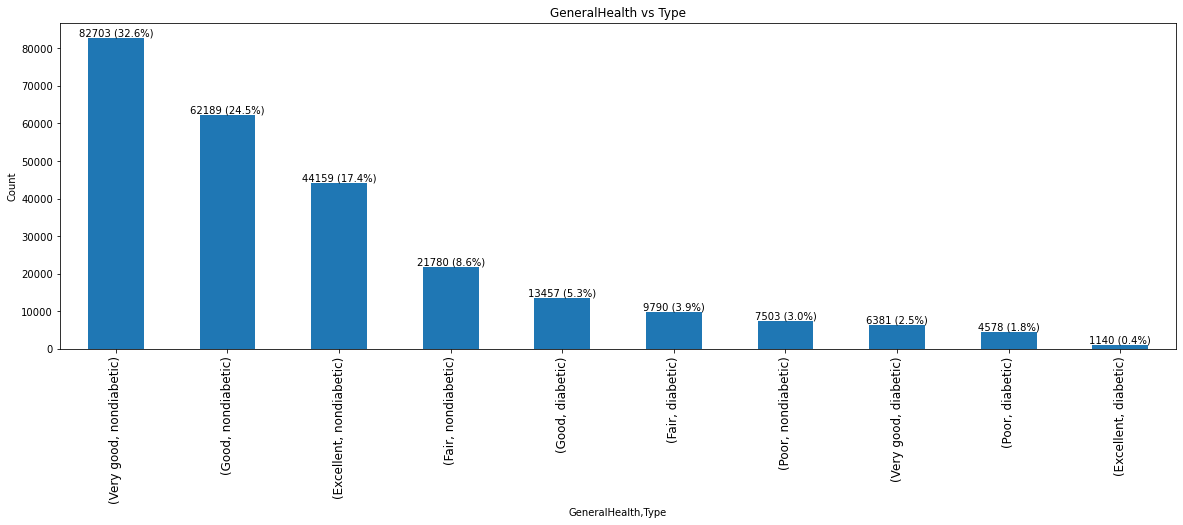

In [87]:
gr = graph_df(df,"GeneralHealth","Type")

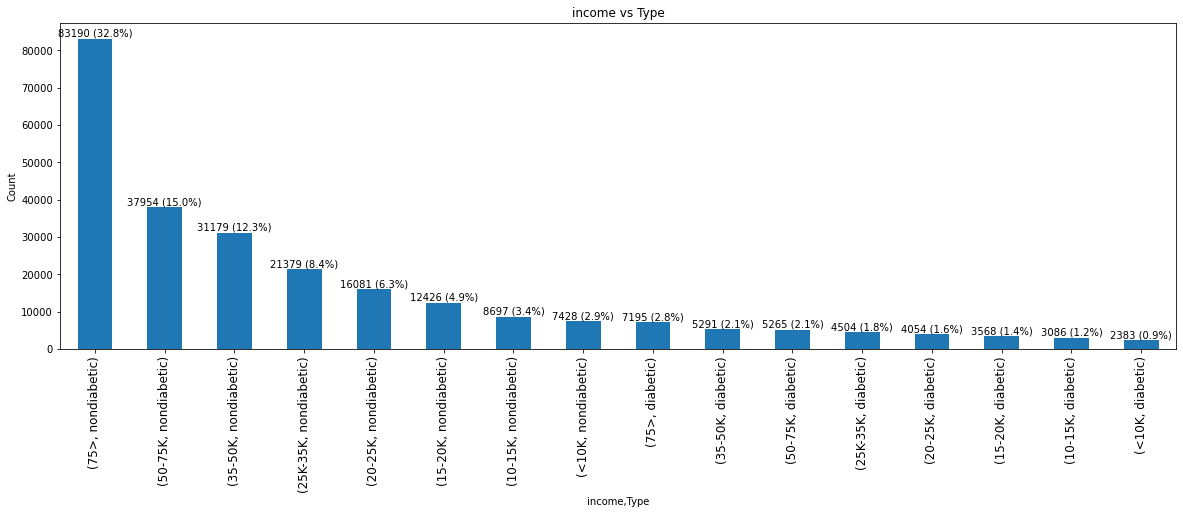

In [88]:
gr = graph_df(df,"income","Type")

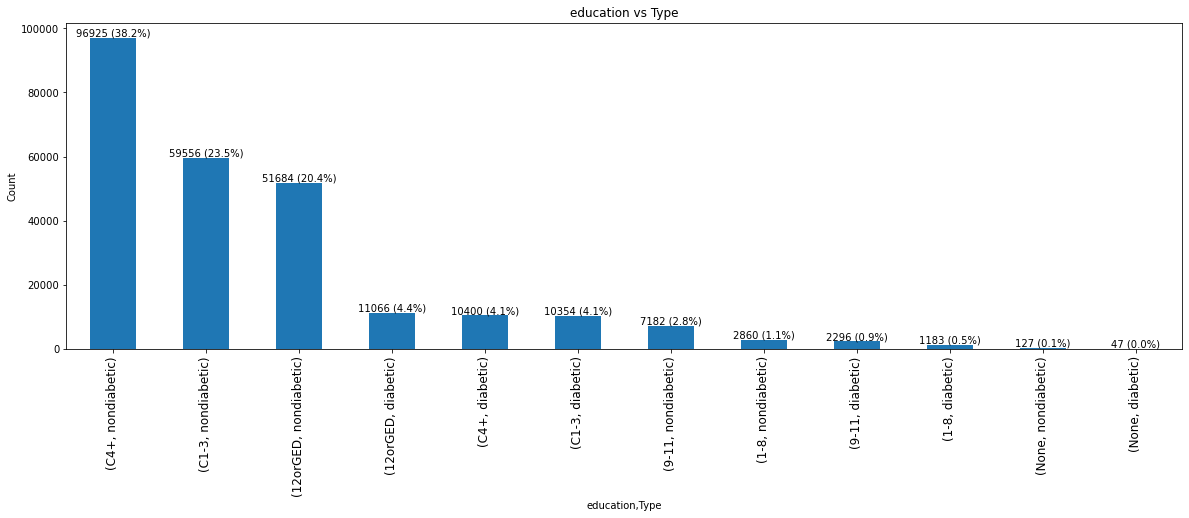

In [89]:
gr = graph_df(df,"education","Type")

### Remember to restart kernel after changes to .py

In [90]:
#import my class with data.  setup in feature_engineering notebook

from prepare import PrepareData
#Testing - Read local data


In [91]:
prepared_data = PrepareData(download_new=False)

In [92]:
data = prepared_data.run()

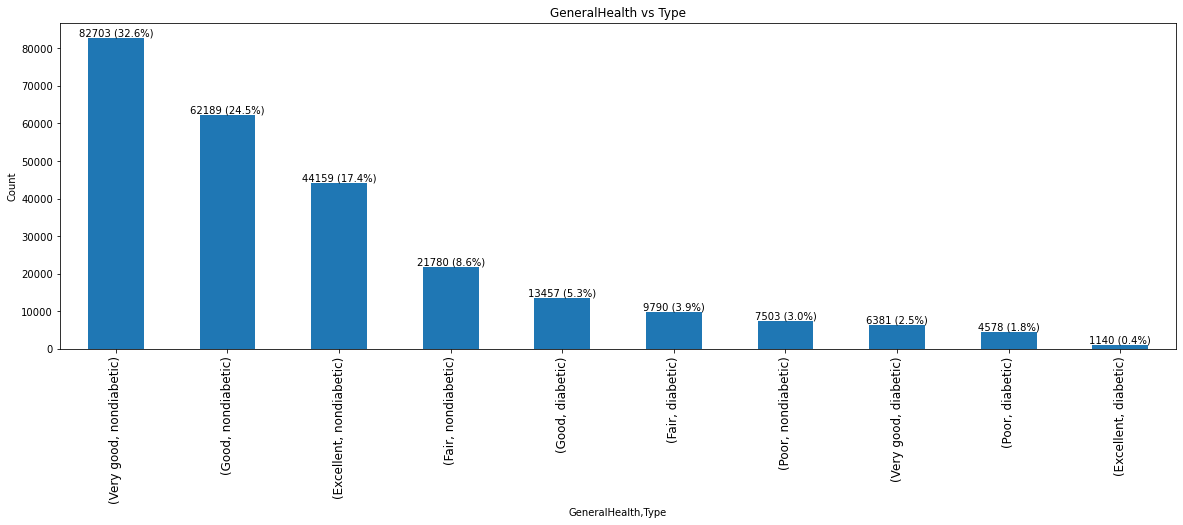

In [93]:
gr = prepared_data.graph_df(data["all"],"GeneralHealth","Type")